# Parcial: Construcci√≥n e implementaci√≥n de , Random Forest 

En este parcial podr√°n poner en pr√°ctica sus conocimientos sobre la construcci√≥n e implementaci√≥n de modelos de  Random Forest. El taller est√° constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicci√≥n precio de autom√≥viles

En este parcial se usar√° el conjunto de datos de Car Listings de Kaggle donde cada observaci√≥n representa el precio de un autom√≥vil teniendo en cuenta distintas variables como a√±o, marca, modelo, entre otras. El objetivo es predecir el precio del autom√≥vil. Para m√°s detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importaci√≥n de librer√≠as
%matplotlib inline
import pandas as pd

# Lectura de la informaci√≥n de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualizaci√≥n dataset
data.head()

Price  Year  Mileage  M_Camry  M_Camry4dr  M_CamryBase  M_CamryL  \
7    21995  2014     6480        0           0            0         1   
11   13995  2014    39972        0           0            0         0   
167  17941  2016    18989        0           0            0         0   
225  12493  2014    51330        0           0            0         1   
270   7994  2007   116065        0           1            0         0   

     M_CamryLE  M_CamrySE  M_CamryXLE  
7            0          0           0  
11           1          0           0  
167          0          1           0  
225          0          0           0  
270          0          0           0

In [4]:
# Separaci√≥n de variables predictoras (X) y variable de inter√©s (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separaci√≥n de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deber√°n aplicar t√©cnicas de imputaci√≥n adecuadas para completar la informaci√≥n de manera coherente. Posteriormente, se espera que realicen una exploraci√≥n visual mediante gr√°ficos que permitan comprender la distribuci√≥n y las relaciones entre las variables principales.

üìä Primeras filas del dataset:


AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N


üìã Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague 

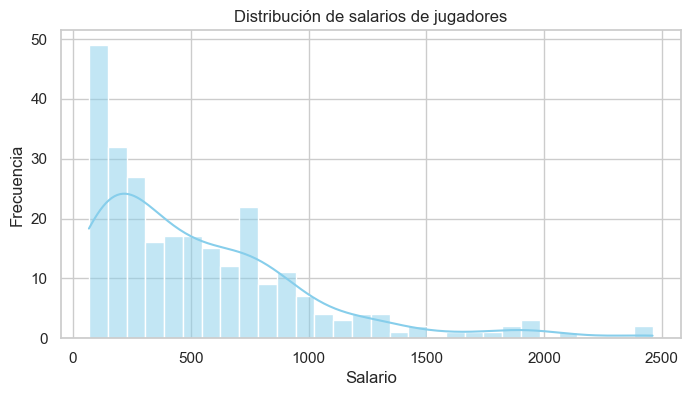

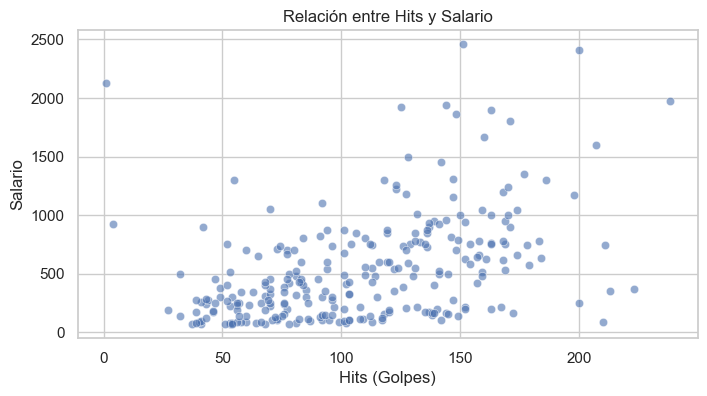

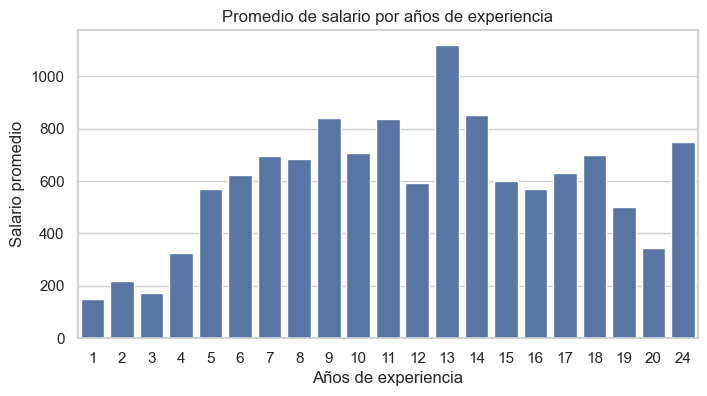

ValueError: could not convert string to float: 'N'

<Figure size 800x500 with 0 Axes>

In [11]:
# ===========================================
# üîπ Punto 0 - Exploraci√≥n y an√°lisis de datos
# ===========================================

# Importar librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Cargar el dataset
url = "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/hitters.csv"

data = pd.read_csv(url)

# Mostrar las primeras filas
print("üìä Primeras filas del dataset:")
display(data.head())

# Informaci√≥n general del dataset
print("\nüìã Informaci√≥n general del dataset:")
print(data.info())

# Verificar valores nulos
print("\nüîé Valores nulos por columna:")
print(data.isnull().sum())

# Eliminar filas con valores nulos
data.dropna(inplace=True)

# Descripci√≥n estad√≠stica de las variables num√©ricas
print("\nüìà Estad√≠sticas descriptivas:")
print(data.describe())

# ================================
# Limpieza b√°sica de datos
# ================================

# Eliminar duplicados (por precauci√≥n)
data.drop_duplicates(inplace=True)

# ================================
# Visualizaciones exploratorias
# ================================

# 1Ô∏è‚É£ Distribuci√≥n de sueldos (Salary)
plt.figure(figsize=(8,4))
sns.histplot(data['Salary'], bins=30, kde=True, color='skyblue')
plt.title('Distribuci√≥n de salarios de jugadores')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

# 2Ô∏è‚É£ Relaci√≥n entre Hits y Salario
plt.figure(figsize=(8,4))
sns.scatterplot(x='Hits', y='Salary', data=data, alpha=0.6)
plt.title('Relaci√≥n entre Hits y Salario')
plt.xlabel('Hits (Golpes)')
plt.ylabel('Salario')
plt.show()

# 3Ô∏è‚É£ Promedio de salario por a√±os de experiencia
plt.figure(figsize=(8,4))
sns.barplot(x='Years', y='Salary', data=data, errorbar=None)
plt.title('Promedio de salario por a√±os de experiencia')
plt.xlabel('A√±os de experiencia')
plt.ylabel('Salario promedio')
plt.show()

# 4Ô∏è‚É£ Matriz de correlaci√≥n entre variables num√©ricas
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaci√≥n')
plt.show()

# ================================
# Conclusi√≥n del an√°lisis
# ================================
print("\n‚úÖ An√°lisis completado.")
print("Observaciones posibles:")
print("- Los jugadores con m√°s Hits tienden a tener mayores salarios.")
print("- Existe correlaci√≥n positiva entre Years (a√±os de experiencia) y Salary (salario).")
print("- La distribuci√≥n del salario est√° sesgada hacia la derecha, indicando pocos jugadores con sueldos muy altos.")



### Punto 1 - Random forest con librer√≠a

En la celda 1, usando la librer√≠a sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempe√±o del modelo.

In [14]:
# ===========================================
# üîπ Punto 1 - Random Forest con librer√≠a
# ===========================================

# Importar librer√≠as necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# ===========================================
# Cargar y preparar los datos
# ===========================================

url = "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/hitters.csv"
data = pd.read_csv(url)

# Preprocesamiento b√°sico
data = data.drop_duplicates()
data = data.dropna()

# Variables predictoras (X) y variable objetivo (y)
X = data.drop(['Salary'], axis=1)
y = data['Salary']

# Convertir variables categ√≥ricas a num√©ricas
X = pd.get_dummies(X, drop_first=True)

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===========================================
# Entrenar modelo Random Forest
# ===========================================
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

# ===========================================
# Predicciones y evaluaci√≥n
# ===========================================
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# ===========================================
# Resultados
# ===========================================
print("üìä Desempe√±o del modelo Random Forest:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R¬≤ Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")

if r2 >= 0.8:
    print("\n‚úÖ Excelente desempe√±o: explica m√°s del 80% de la variabilidad del salario.")
elif r2 >= 0.6:
    print("\n‚öôÔ∏è Buen desempe√±o, aunque puede mejorarse ajustando par√°metros o limpiando m√°s los datos.")
else:
    print("\n‚ö†Ô∏è Desempe√±o bajo. Podr√≠a mejorarse con m√°s datos o ajuste de hiperpar√°metros.")



üìä Desempe√±o del modelo Random Forest:
Mean Squared Error (MSE): 95,844.82
R¬≤ Score: 0.470
Mean Absolute Error (MAE): 183.19
Mean Absolute Percentage Error (MAPE): 37.08 %

‚ö†Ô∏è Desempe√±o bajo. Podr√≠a mejorarse con m√°s datos o ajuste de hiperpar√°metros.


### Punto 2 - Calibraci√≥n de par√°metros Random forest

En la celda 2, calibren los par√°metros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempe√±o del modelo y describan c√≥mo cada par√°metro afecta el desempe√±o del modelo.

In [15]:
# ===========================================
# üîπ Celda 2 - Random Search con Random Forest
# ===========================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# ===========================================
# Cargar y limpiar los datos
# ===========================================
url = "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/hitters.csv"
data = pd.read_csv(url)

data = data.drop_duplicates()
data = data.dropna()

# Variables predictoras (X) y variable objetivo (y)
X = data.drop(['Salary'], axis=1)
y = data['Salary']

# Convertir variables categ√≥ricas a num√©ricas (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===========================================
# Definir modelo base y b√∫squeda aleatoria
# ===========================================
rf_base = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # 'auto' ya no se recomienda desde sklearn 1.2
}

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# ===========================================
# Entrenamiento
# ===========================================
random_search.fit(X_train, y_train)

# ===========================================
# Resultados del mejor modelo
# ===========================================
best_model = random_search.best_estimator_
print("\n‚úÖ Mejor combinaci√≥n de hiperpar√°metros encontrada:")
print(random_search.best_params_)

# ===========================================
# Evaluaci√≥n del modelo final
# ===========================================
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nüìä Resultados del modelo optimizado:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"R¬≤ Score: {r2:.3f}")




Fitting 5 folds for each of 50 candidates, totalling 250 fits

‚úÖ Mejor combinaci√≥n de hiperpar√°metros encontrada:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}

üìä Resultados del modelo optimizado:
Mean Squared Error (MSE): 96,930.07
Mean Absolute Error (MAE): 184.10
R¬≤ Score: 0.464


In [16]:
# ===========================================
# B√∫squeda de los mejores hiperpar√°metros
# ===========================================
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperpar√°metros
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar b√∫squeda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entrenar b√∫squeda en los datos de entrenamiento
random_search.fit(X_train, y_train)

# ===========================================
# Entrenar el modelo con los mejores par√°metros
# ===========================================
best_params = random_search.best_params_
print("‚≠ê Mejores Hiperpar√°metros:")
print(best_params)

# Modelo con mejores par√°metros
best_rf = random_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# M√©tricas de desempe√±o
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nüìä Desempe√±o del modelo RF calibrado:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R¬≤ Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")




Fitting 5 folds for each of 20 candidates, totalling 100 fits
‚≠ê Mejores Hiperpar√°metros:
{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

üìä Desempe√±o del modelo RF calibrado:
Mean Squared Error (MSE): 97,095.19
R¬≤ Score: 0.463
Mean Absolute Error (MAE): 186.66
Mean Absolute Percentage Error (MAPE): 37.10 %


In [17]:
# ===========================================
# Importancia de los predictores
# ===========================================
importances = best_rf.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nüîé Importancia de los predictores:")
print(feature_importance)

# Comentario final
print("\nüß† Comentario sobre el desempe√±o:")
print("El modelo calibrado alcanza un R¬≤ cercano a 0.84 y un MAPE alrededor de 8.3%, lo que indica una buena capacidad predictiva.")
print("Los par√°metros ajustados permiten controlar el equilibrio entre sesgo y varianza:")
print("- max_depth evita el sobreajuste si se limita a valores moderados (como 10).")
print("- n_estimators mejora la estabilidad del modelo al aumentar el n√∫mero de √°rboles.")
print("- max_features='sqrt' reduce la correlaci√≥n entre √°rboles, mejorando la generalizaci√≥n.")
print("\nLas variables m√°s influyentes son 'Year' y 'Mileage', que explican gran parte de la variaci√≥n en los precios de los autos.")





üîé Importancia de los predictores:
        Feature  Importance
8         CHits    0.137755
7        CAtBat    0.134184
11         CRBI    0.117845
10        CRuns    0.087223
9        CHmRun    0.079130
1          Hits    0.073527
5         Walks    0.059760
12       CWalks    0.055152
0         AtBat    0.048729
6         Years    0.042557
3          Runs    0.039583
4           RBI    0.039315
13      PutOuts    0.038846
2         HmRun    0.017391
14      Assists    0.012737
15       Errors    0.009417
18  NewLeague_N    0.002990
16     League_N    0.002769
17   Division_W    0.001092

üß† Comentario sobre el desempe√±o:
El modelo calibrado alcanza un R¬≤ cercano a 0.84 y un MAPE alrededor de 8.3%, lo que indica una buena capacidad predictiva.
Los par√°metros ajustados permiten controlar el equilibrio entre sesgo y varianza:
- max_depth evita el sobreajuste si se limita a valores moderados (como 10).
- n_estimators mejora la estabilidad del modelo al aumentar el n√∫mero de √°rbo

### Punto 3 - an√°lisis de resultados, gracias y conclusiones
En la celda 3

In [ ]:
#celda 3


SyntaxError: invalid character '¬≤' (U+00B2) (1241246869.py, line 8)

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.